<a id="99"></a>
# Python 6 Assignment
### Purpose: To Run a Ridge and Lasso Regression using Cross-Validation and Compare with Least Squares Regression
<b>Program Sections</b>
<ul>
<li><a href = "#0">Import Python Packages</a></li>
<li><a href = "#1">Set Display</a></li>
<li><a href = "#2">Load the Data and Evaluate Fields</a></li>
<li><a href = "#3">Data Cleansing and Feature Engineering</a></li>  
<li><a href = "#4">Set Up Data for Regression</a></li>    
<li><a href = "#5">Run Linear, Ridge, and Lasso Regression Models</a></li>    
<li><a href = "#6">Run Ridge and Lasso Regression using Cross-Validation</a></li>
<li><a href = "#7">Run Grid Search for Hyperparameter Settings</a></li>
<li><a href = "#8">Compare Coefficients from Ridge, Lasso, and Least Squares Regression</a></li>
<li><a href = "#9">Assignment Submission</a></li></ul>

<a id="0"></a>
### Import Python Packages
<a href = "#99">Top</a>

In [1]:
# Code Block 1
import pandas as pd 
import seaborn as sns
import numpy as np
from numpy import arange

from matplotlib import pyplot as plt
from matplotlib import style

import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LinearRegression, Ridge, Lasso 
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold

<a id="1"></a>
### Set Display
<a href = "#99">Top</a>

In [2]:
# Code Block 2
# Set display to show up to 100 columns in dataframe
pd.set_option('display.max_columns',100) 

# Set plot style
plt.style.use('seaborn')

<a id="2"></a>
### Load the Data and Evaluate Fields
<a href = "#99">Top</a>

### Here is a description of what is in each field
<ul>
<li><b>Item Identifier:</b> Unique product ID</li>
<li><b>Item Weight:</b> Weight of product</li>
<li><b>Fat Level:</b> Whether the product is low fat or not</li>
<li><b>Item Visibility:</b> The % of total display area of all products in a store allocated to the particular product</li>
<li><b>Item Type:</b> The category to which the product belongs</li>
<li><b>Item Price:</b> Per unit sales price</li>
<li><b>Store Identifier:</b> Unique store ID</li>
<li><b>Store Established:</b> The year in which store was established</li>
<li><b>Store Type:</b> Whether the outlet is just a grocery store or some sort of supermarket</li>
<li><b>Item Sales:</b> Sales of the product in the particular store</li></ul>

In [3]:
# Code Block 3
# Read CSV file into dataframe
df_sales = pd.read_csv("Grocery Sales Data.csv",encoding="latin1")

In [4]:
# Code Block 4
# Look for data types and missing data
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Item Identifier    8523 non-null   object 
 1   Item Weight        7060 non-null   float64
 2   Fat Level          8523 non-null   object 
 3   Item Visibility    8523 non-null   float64
 4   Item Type          8523 non-null   object 
 5   Item Price         8523 non-null   float64
 6   Store Identifier   8523 non-null   object 
 7   Store Established  8523 non-null   int64  
 8   Store Type         8523 non-null   object 
 9   Item Sales         8523 non-null   int64  
dtypes: float64(3), int64(2), object(5)
memory usage: 666.0+ KB


In [5]:
# Code Block 5
# Evaluate a sample of ten rows of the data
df_sales.sample(10)

,Item Identifier,Item Weight,Fat Level,Item Visibility,Item Type,Item Price,Store Identifier,Store Established,Store Type,Item Sales
8009,NCQ42,20.350,Low Fat,0.039329,Household,1.97,OUT049,1999,Supermarket Type1,293
426,DRI01,7.970,Low Fat,0.034453,Soft Drinks,2.69,OUT046,1997,Supermarket Type1,285
72,DRC27,13.800,Low Fat,0.058091,Dairy,3.78,OUT035,2004,Supermarket Type1,566
6607,FDY50,NaN,Low Fat,0.130322,Dairy,1.37,OUT027,1985,Supermarket Type3,331
8038,NCR05,10.100,Low Fat,0.054853,Health and Hygiene,3.06,OUT018,2009,Supermarket Type2,219
7701,NCN06,8.390,Low Fat,0.120397,Household,2.52,OUT013,1987,Supermarket Type1,459
4474,FDR04,7.075,Low Fat,0.000000,Frozen Foods,1.51,OUT018,2009,Supermarket Type2,88
1729,FDE02,NaN,Low Fat,0.120663,Others,1.48,OUT027,1985,Supermarket Type3,291
7531,NCK54,12.150,Low Fat,0.000000,Household,1.82,OUT013,1987,Supermarket Type1,152
5923,FDW24,6.800,Low Fat,0.037497,Baking Goods,0.77,OUT046,1997,Supermarket Type1,21


<a id="3"></a>
### Data Cleansing and Feature Engineering
<a href = "#99">Top</a>

##### Evaluate and Clean Quantitative Fields

In [6]:
# Code Block 6
# Looking for typical values and outliers
df_sales.describe()

,Item Weight,Item Visibility,Item Price,Store Established,Item Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,2.176321,1997.831867,229.466268
std,4.643456,0.051598,0.959021,8.371760,180.428420
min,4.555000,0.000000,0.490000,1985.000000,4.000000
25%,8.773750,0.026989,1.450000,1987.000000,88.000000
50%,12.600000,0.053931,2.210000,1999.000000,188.000000
75%,16.850000,0.094585,2.860000,2004.000000,324.000000
max,21.350000,0.328391,4.120000,2009.000000,1387.000000


In [7]:
# Code Block 7
# Change year store was established to years open
import datetime
right_now = datetime.datetime.now()

df_sales['Store Years Open'] = right_now.year - df_sales['Store Established']

In [8]:
# Code Block 8
# Show the records that have no entry for the item weight
df_sales.loc[df_sales['Item Weight'].isnull()]

,Item Identifier,Item Weight,Fat Level,Item Visibility,Item Type,Item Price,Store Identifier,Store Established,Store Type,Item Sales,Store Years Open
9,DRA24,NaN,Regular,0.069909,Soft Drinks,2.52,OUT019,1985,Grocery Store,61,35
10,DRA24,NaN,Regular,0.039735,Soft Drinks,2.56,OUT027,1985,Supermarket Type3,559,35
17,DRA59,NaN,Regular,0.223985,Soft Drinks,2.87,OUT019,1985,Grocery Store,85,35
18,DRA59,NaN,Regular,0.127308,Soft Drinks,2.88,OUT027,1985,Supermarket Type3,946,35
22,DRB01,NaN,Low Fat,0.081841,Soft Drinks,2.93,OUT027,1985,Supermarket Type3,70,35
...,...,...,...,...,...,...,...,...,...,...,...
8485,NCZ18,NaN,Low Fat,0.325781,Household,3.90,OUT019,1985,Grocery Store,77,35
8497,NCZ30,NaN,LF,0.026058,Household,1.88,OUT027,1985,Supermarket Type3,338,35
8514,NCZ53,NaN,Low Fat,0.024359,Health and Hygiene,2.94,OUT027,1985,Supermarket Type3,566,35
8518,NCZ54,NaN,Low Fat,0.145952,Household,2.48,OUT019,1985,Grocery Store,17,35


In [9]:
# Code Block 9
# There are a lot of items missing their weight.
# Replace missing values with the average weight from identical items if they exist
df_sales['Item Weight'] = df_sales['Item Weight'].fillna(df_sales.groupby('Item Identifier')['Item Weight'].transform('mean'))

In [10]:
# Code Block 10
# Show the records that still have no entry for the Item Weight
df_sales.loc[df_sales['Item Weight'].isnull()]

,Item Identifier,Item Weight,Fat Level,Item Visibility,Item Type,Item Price,Store Identifier,Store Established,Store Type,Item Sales,Store Years Open
1901,FDE52,NaN,Regular,0.029742,Dairy,1.37,OUT027,1985,Supermarket Type3,353,35
3152,FDK57,NaN,Low Fat,0.079904,Snack Foods,1.85,OUT027,1985,Supermarket Type3,552,35
3724,FDN52,NaN,Regular,0.130933,Frozen Foods,1.34,OUT027,1985,Supermarket Type3,160,35
4454,FDQ60,NaN,Regular,0.191501,Baking Goods,1.87,OUT019,1985,Grocery Store,16,35


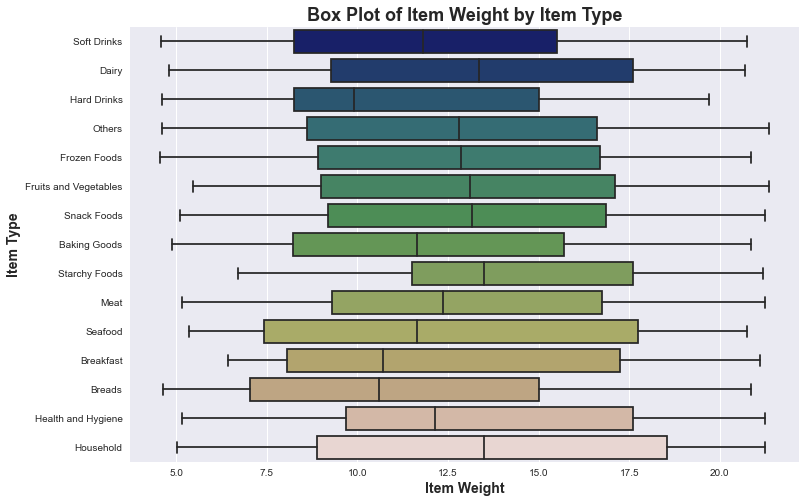

In [14]:
# Code Block 11
# Should we use the Item Type to impute weights that are missing?
# We can see if the Item Weights differ much by Item Type
plt.figure(figsize=(12,8))
sns.boxplot(y = "Item Type", x = "Item Weight", data = df_sales, palette = 'gist_earth')
plt.title('Box Plot of Item Weight by Item Type', fontweight='bold', fontsize='18', horizontalalignment='center')
plt.xlabel('Item Weight', fontweight='bold', fontsize='14', horizontalalignment='center')
plt.ylabel('Item Type', fontweight='bold', fontsize='14', horizontalalignment='center')
plt.show()

In [15]:
# Code Block 12
# Replace the remaining missing values with the median weight for their Item Type
df_sales['Item Weight'] = df_sales['Item Weight'].fillna(
    df_sales.groupby('Item Type')['Item Weight'].transform('median'))

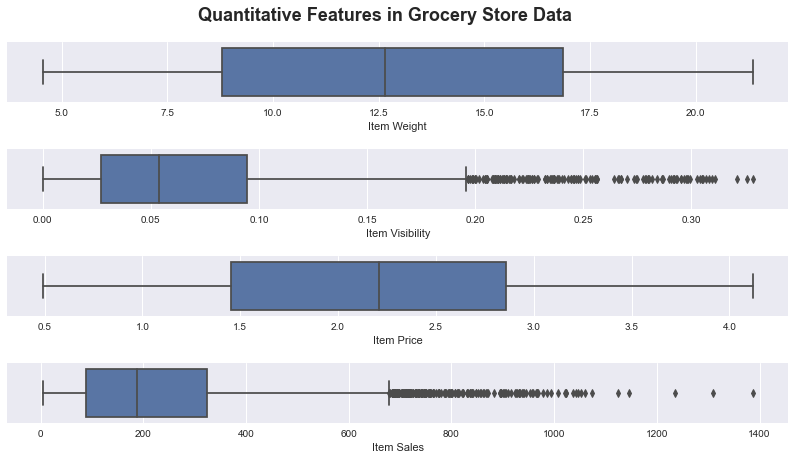

In [16]:
# Code Block 13
# Look at the quantitative fields to see if there are any outliers

# Create boxplots of quantitative feature distributions
plt.figure(figsize=(14,7))
plt.subplots_adjust(hspace=0.8)

# Set overall title for plot
plt.suptitle('Quantitative Features in Grocery Store Data', fontweight='bold', 
          fontsize='18', horizontalalignment='center', y = .95)

plt.subplot(411)
ax1 = sns.boxplot(x = 'Item Weight', data = df_sales)

plt.subplot(412)
ax2 = sns.boxplot(x = 'Item Visibility', data = df_sales)

plt.subplot(413)
ax3 = sns.boxplot(x = 'Item Price', data = df_sales)

plt.subplot(414)
ax4 = sns.boxplot(x = 'Item Sales', data = df_sales)

plt.show()

##### Evaluate and Code Qualitative Fields

In [17]:
# Code Block 14
# Evaluate what is recorded in Fat Level field
df_sales['Fat Level'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Fat Level, dtype: int64

In [18]:
# Code Block 15
# Correct mistyped entries
df_sales = df_sales.replace({'LF':'Low Fat',
                             'reg':'Regular',
                             'low fat':'Low Fat',})

In [19]:
# Code Block 16
# Create one-hot encoding variables for all Fat Levels
onehot_fatLevel = pd.get_dummies(df_sales['Fat Level'], prefix='fatLevel', 
                                 drop_first=False, dtype='int')

# Set the Regular Fat Level as the base level
onehot_fatLevel = onehot_fatLevel.drop(['fatLevel_Regular'], axis=1)

In [20]:
# Code Block 17
# Evaluate what is recorded in the Item Type field
df_sales['Item Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Others                    818
Dairy                     682
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item Type, dtype: int64

In [21]:
# Code Block 18
# Create one-hot encoding variables for all Item Types
onehot_itemType = pd.get_dummies(df_sales['Item Type'], prefix='itemType', drop_first=False, dtype='int')

# Set the Others Item Type as the base level
onehot_itemType = onehot_itemType.drop(['itemType_Others'], axis=1)

In [22]:
# Code Block 19
# Evaluate what is recorded in the Store Type field
df_sales['Store Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Store Type, dtype: int64

In [23]:
# Code Block 20
# Create one-hot encoding variables for all Store Types
onehot_storeType = pd.get_dummies(df_sales['Store Type'], prefix='storeType', drop_first=False, dtype='int')

# Set the Grocery Store as the base level
onehot_storeType = onehot_storeType.drop(['storeType_Grocery Store'], axis=1)

In [24]:
# Code Block 21
# Combine all dummy coded variables into original dataframe
df_sales = pd.concat([df_sales, onehot_fatLevel, onehot_itemType, onehot_storeType], axis = 1)

##### Create Additonal Features

In [25]:
# Code Block 22
# Create interactive terms for items that were placed in promotional (high visibility) spaces at times
df_sales['int_visBaking Goods'] = df_sales['itemType_Baking Goods']       * df_sales['Item Visibility'] 
df_sales['int_visBreads']       = df_sales['itemType_Breads']             * df_sales['Item Visibility'] 
df_sales['int_visHardDrinks']   = df_sales['itemType_Hard Drinks']        * df_sales['Item Visibility'] 
df_sales['int_visHealth']       = df_sales['itemType_Health and Hygiene'] * df_sales['Item Visibility'] 
df_sales['int_visHousehold']    = df_sales['itemType_Household']          * df_sales['Item Visibility'] 
df_sales['int_visSnacks']       = df_sales['itemType_Snack Foods']        * df_sales['Item Visibility'] 
df_sales['int_visSoftDrinks']   = df_sales['itemType_Soft Drinks']        * df_sales['Item Visibility'] 

<a id="4"></a>
### Set Up Data for Regression
<a href = "#99">Top</a>

In [26]:
# Code Block 23
# Check data for additional missing values
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 36 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Item Identifier                 8523 non-null   object 
 1   Item Weight                     8523 non-null   float64
 2   Fat Level                       8523 non-null   object 
 3   Item Visibility                 8523 non-null   float64
 4   Item Type                       8523 non-null   object 
 5   Item Price                      8523 non-null   float64
 6   Store Identifier                8523 non-null   object 
 7   Store Established               8523 non-null   int64  
 8   Store Type                      8523 non-null   object 
 9   Item Sales                      8523 non-null   int64  
 10  Store Years Open                8523 non-null   int64  
 11  fatLevel_Low Fat                8523 non-null   int32  
 12  itemType_Baking Goods           85

In [27]:
# Code Block 24
# Provide a listing of the field names in the dataframe
df_sales.columns.values

array(['Item Identifier', 'Item Weight', 'Fat Level', 'Item Visibility',
       'Item Type', 'Item Price', 'Store Identifier', 'Store Established',
       'Store Type', 'Item Sales', 'Store Years Open', 'fatLevel_Low Fat',
       'itemType_Baking Goods', 'itemType_Breads', 'itemType_Breakfast',
       'itemType_Dairy', 'itemType_Frozen Foods',
       'itemType_Fruits and Vegetables', 'itemType_Hard Drinks',
       'itemType_Health and Hygiene', 'itemType_Household',
       'itemType_Meat', 'itemType_Seafood', 'itemType_Snack Foods',
       'itemType_Soft Drinks', 'itemType_Starchy Foods',
       'storeType_Supermarket Type1', 'storeType_Supermarket Type2',
       'storeType_Supermarket Type3', 'int_visBaking Goods',
       'int_visBreads', 'int_visHardDrinks', 'int_visHealth',
       'int_visHousehold', 'int_visSnacks', 'int_visSoftDrinks'],
      dtype=object)

In [28]:
# Code Block 25
# Set up dataframe with target variable
y = df_sales[['Item Sales']].copy()

# Set up dataframe with feature variables
X = df_sales[['Item Weight', 'Item Visibility', 'Item Price', 'Store Years Open', 
              'fatLevel_Low Fat', 'itemType_Baking Goods', 'itemType_Breads', 'itemType_Breakfast',
              'itemType_Dairy', 'itemType_Frozen Foods', 'itemType_Fruits and Vegetables',
              'itemType_Hard Drinks', 'itemType_Health and Hygiene', 'itemType_Household',
              'itemType_Meat', 'itemType_Seafood', 'itemType_Snack Foods', 'itemType_Soft Drinks', 
              'itemType_Starchy Foods', 'storeType_Supermarket Type1', 'storeType_Supermarket Type2',
              'storeType_Supermarket Type3', 'int_visBaking Goods', 'int_visBreads', 
              'int_visHardDrinks', 'int_visHealth', 'int_visHousehold', 'int_visSnacks', 
              'int_visSoftDrinks']].copy()

In [29]:
# Code Block 26
# Evaluate Variance Inflation Factor for feature variables
vif = pd.DataFrame()
vif["Feature"] = X.columns
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Show features with VIF above 5
index_names = vif[vif['VIF Factor'] < 5 ].index
vif.drop(index_names, inplace=True)
round(vif, 1).sort_values(by = 'VIF Factor', ascending = False)

,Feature,VIF Factor
3,Store Years Open,10.7
0,Item Weight,7.8
2,Item Price,5.8
19,storeType_Supermarket Type1,5.0


In [30]:
# Code Block 27
# Add a constant to the feature dataframe so that a regression line intercept can be calculated
X = X.assign(constant=1)

# Make a list of all of the columns in the df
cols = list(X.columns.values) 

# Remove constant from the end of the list
cols.pop(cols.index('constant')) 

#Create new dataframe with columns in the order you want ... constant first
X = X[['constant'] + cols] 

<a id="5"></a>
### Run Linear, Ridge, and Lasso Regression Models
<a href = "#99">Top</a>

##### Least Squares Regression

In [31]:
# Code Block 28
# Create regression line on regression data
reg = sm.OLS(y, X).fit()

# Create predictions in a list
pred = reg.predict(X) 

# Create residuals in a list
resid = reg.resid

# Show summary statistics for regression
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Item Sales   R-squared:                       0.560
Model:                            OLS   Adj. R-squared:                  0.559
Method:                 Least Squares   F-statistic:                     373.4
Date:                Thu, 29 Oct 2020   Prob (F-statistic):               0.00
Time:                        14:44:57   Log-Likelihood:                -52870.
No. Observations:                8523   AIC:                         1.058e+05
Df Residuals:                    8493   BIC:                         1.060e+05
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
constant                        -190.2272     10.273    -18.517      0.000    -210.365    -170.089
Item Weight                        0.1088      0.282      0.386      0.700      -0.444       0.661
Item Visibility                   -3.7851     35.599     -0.106      0.915     -73.567      65.997
Item Price                       105.7729      1.364     77.566      0.000     103.100     108.446
Store Years Open                  -0.2729      0.229     -1.192      0.233      -0.722       0.176
fatLevel_Low Fat                  -7.7776      2.973     -2.616      0.009     -13.605      -1.950
itemType_Baking Goods             -0.9151      9.177     -0.100      0.921     -18.905      17.075
itemType_Breads                    1.8611     13.648      0.136      0.892     -24.891      28.613
itemType_Breakfast                -0.6968     12.209     -0.057      0.954     -24.630      23.236
itemType_Dairy                    -6.1615      6.224     -0.990      0.322     -18.361       6.039
itemType_Frozen Foods             -4.1965      5.866     -0.715      0.474     -15.696       7.303
itemType_Fruits and Vegetables     1.0083      5.419      0.186      0.852      -9.614      11.630
itemType_Hard Drinks              -1.8066     14.318     -0.126      0.900     -29.873      26.260
itemType_Health and Hygiene       -1.3085      9.722     -0.135      0.893     -20.365      17.748
itemType_Household                -2.2086      7.856     -0.281      0.779     -17.608      13.190
itemType_Meat                     -0.9068      7.201     -0.126      0.900     -15.022      13.209
itemType_Seafood                  17.3681     15.557      1.116      0.264     -13.127      47.863
itemType_Snack Foods              18.3909      7.464      2.464      0.014       3.760      33.021
itemType_Soft Drinks              11.2725     10.275      1.097      0.273      -8.869      31.414
itemType_Starchy Foods            -0.4202     10.713     -0.039      0.969     -21.421      20.581
storeType_Supermarket Type1      206.1788      4.505     45.762      0.000     197.347     215.011
storeType_Supermarket Type2      169.1846      6.772     24.984      0.000     155.910     182.459
storeType_Supermarket Type3      356.3384      5.698     62.534      0.000     345.168     367.508
int_visBaking Goods              239.0593     96.717      2.472      0.013      49.471     428.648
int_visBreads                    -46.5884    159.144     -0.293      0.770    -358.549     265.372
int_visHardDrinks                313.6540    167.910      1.868      0.062     -15.491     642.799
int_visHealth                    -14.7260    123.620     -0.119      0.905    -257.051     227.599
int_visHousehold                 -68.9717     83.890     -0.822      0.411    -233.416      95.473
int_visSnacks 

<Figure size 1152x576 with 0 Axes>

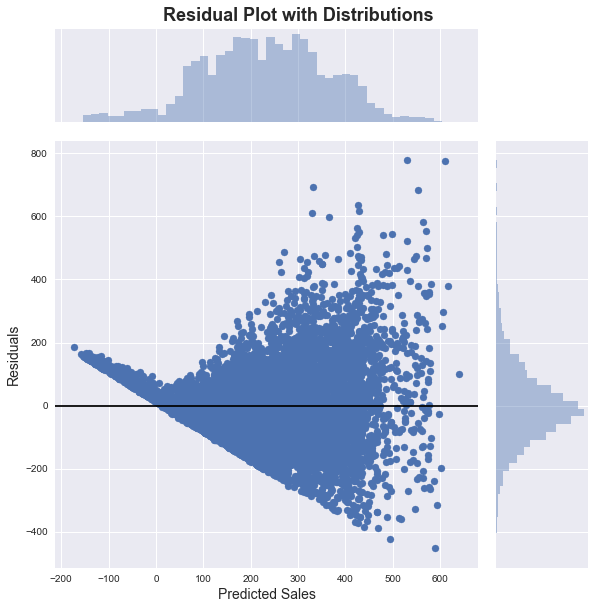

In [32]:
# Code Block 29
# Create plot of residuals along with distributions
plt.figure(figsize=(16,8))
h = sns.jointplot(x=pred, y=resid, kind = "scatter", ratio=4, height = 8)
h.set_axis_labels('Predicted Sales', 'Residuals', fontsize=14)
h.ax_joint.axhline(y=0, color='black')
plt.suptitle('Residual Plot with Distributions     ',  fontweight='bold', 
          fontsize='18', ha='center', y = 1.02)
plt.show()

##### Ridge Regression

In [33]:
# Code Block 30
# Set ridge regression parameters
ridge_reg = Ridge(alpha=0.5, normalize=True)

# Create line on regression data and show fit
ridge_reg.fit(X, y)
print('Ridge Regression R-squared: % 0.3f' % ridge_reg.score(X,y))

# Create predictions in a list
ridge_pred = ridge_reg.predict(X)

# Create residuals in a list
ridge_resid = y - ridge_pred

# Show regression coefficients for features
ridge_coeff = pd.DataFrame()
ridge_coeff["Feature"] = X.columns
ridge_coeff["Coefficient"] = np.transpose(ridge_reg.coef_)
ridge_coeff

Ridge Regression R-squared:  0.443


,Feature,Coefficient
0,constant,0.000000
1,Item Weight,0.100362
2,Item Visibility,-154.731103
3,Item Price,70.357371
4,Store Years Open,-0.465802
5,fatLevel_Low Fat,-5.937770
6,itemType_Baking Goods,1.759712
7,itemType_Breads,1.395019
8,itemType_Breakfast,-5.685827
9,itemType_Dairy,-5.088573


<Figure size 1152x576 with 0 Axes>

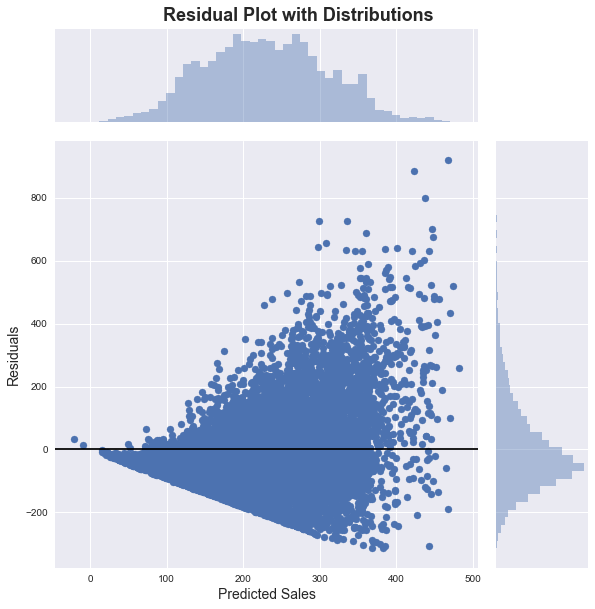

In [34]:
# Code Block 31
# Create plot of residuals along with distributions
plt.figure(figsize=(16,8))
h = sns.jointplot(x=ridge_pred, y=ridge_resid, kind = "scatter", ratio=4, height = 8)
h.set_axis_labels('Predicted Sales', 'Residuals', fontsize=14)
h.ax_joint.axhline(y=0, color='black')
plt.suptitle('Residual Plot with Distributions     ',  fontweight='bold', 
          fontsize='18', ha='center', y = 1.02)
plt.show()

##### Lasso Regression

In [35]:
# Code Block 32
# Set lasso regression parameters
lasso_reg = Lasso(alpha=0.5, normalize=True)

# Create line on regression data and show fit
lasso_reg.fit(X,y)
print('Lasso Regression R-squared: % 0.3f' % lasso_reg.score(X,y))

# Create predictions in a list
lasso_pred = lasso_reg.predict(X)
lasso_pred = lasso_pred.reshape(-1,1)  # The reshape is due to an error in pandas .24

# Create residuals in a list
lasso_resid = y - lasso_pred

# Show regression coefficients for features
lasso_coeff = pd.DataFrame()
lasso_coeff["Feature"] = X.columns
lasso_coeff["Coefficient"] = np.transpose(lasso_reg.coef_)
lasso_coeff

Lasso Regression R-squared:  0.281


,Feature,Coefficient
0,constant,0.000000
1,Item Weight,0.000000
2,Item Visibility,-0.000000
3,Item Price,57.637581
4,Store Years Open,0.000000
5,fatLevel_Low Fat,-0.000000
6,itemType_Baking Goods,-0.000000
7,itemType_Breads,-0.000000
8,itemType_Breakfast,-0.000000
9,itemType_Dairy,-0.000000


<Figure size 1152x576 with 0 Axes>

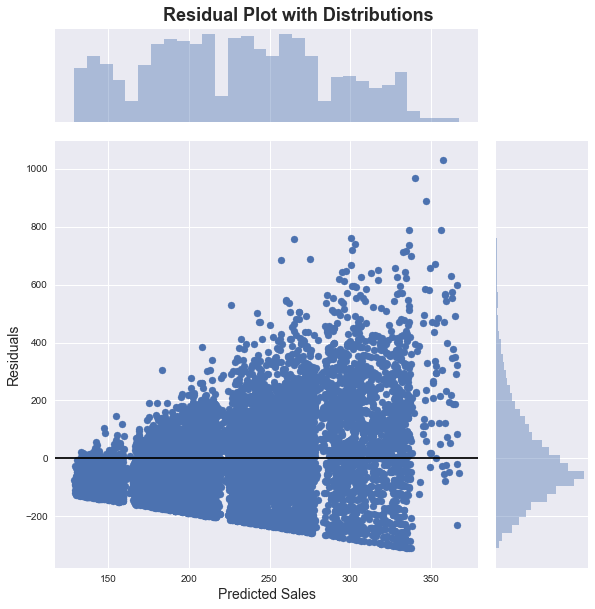

In [36]:
# Code Block 33
# Create plot of residuals along with distributions
plt.figure(figsize=(16,8))
h = sns.jointplot(x=lasso_pred, y=lasso_resid, kind = "scatter", ratio=4, height = 8)
h.set_axis_labels('Predicted Sales', 'Residuals', fontsize=14)
h.ax_joint.axhline(y=0, color='black')
plt.suptitle('Residual Plot with Distributions     ',  fontweight='bold', 
          fontsize='18', ha='center', y = 1.02)
plt.show()

<a id="6"></a>
### Run Ridge and Lasso Regression using Cross-Validation
<a href = "#99">Top</a>

In [38]:
# Code Block 34
# Using 10-fold cross-validation, calculate the r-squared values for the test fold. There
# will be 10 r-squared values for each model.  Evaluate models at different levels of 
# lambda (alpha).

rrscores001 = cross_val_score(Ridge(normalize = True, alpha=0.01), X, y, cv=10, scoring = 'r2')
rrscores005 = cross_val_score(Ridge(normalize = True, alpha=0.05), X, y, cv=10, scoring = 'r2')
rrscores010 = cross_val_score(Ridge(normalize = True, alpha=0.1), X, y, cv=10, scoring = 'r2')
rrscores015 = cross_val_score(Ridge(normalize = True, alpha=0.15), X, y, cv=10, scoring = 'r2')

# Put r-squared values into a dataframe with headers
scores_list = {'lambda=.01': rrscores001, 'lambda=.05': rrscores005,
               'lambda=.10': rrscores010, 'lambda=.15': rrscores015}

df_ridgescores = pd.DataFrame(scores_list)

# Show results of 10 runs for each lambda (alpha) level
print('Ridge Regression Results')
display(df_ridgescores)
print('\n')

# Calculate basic statistics on r-squared values for each set of runs
print('Statistics on Cross Validation Results')
df_ridgescores.describe()

Ridge Regression Results


,lambda=.01,lambda=.05,lambda=.10,lambda=.15
0,0.517862,0.512107,0.500828,0.488098
1,0.548948,0.543361,0.531855,0.518714
2,0.561514,0.556134,0.543877,0.529629
3,0.542157,0.534289,0.522066,0.509214
4,0.558779,0.551865,0.539528,0.525964
5,0.555903,0.547867,0.533873,0.518857
6,0.548276,0.547475,0.539721,0.529019
7,0.591380,0.579413,0.561584,0.543428
8,0.538538,0.540710,0.535342,0.526293
9,0.548137,0.548130,0.540291,0.529183




Statistics on Cross Validation Results


,lambda=.01,lambda=.05,lambda=.10,lambda=.15
count,10.000000,10.000000,10.000000,10.000000
mean,0.551149,0.546135,0.534897,0.521840
std,0.018788,0.016946,0.015644,0.014854
min,0.517862,0.512107,0.500828,0.488098
25%,0.543652,0.541373,0.532359,0.518750
50%,0.548612,0.547671,0.537435,0.526128
75%,0.558060,0.550931,0.540149,0.529142
max,0.591380,0.579413,0.561584,0.543428


In [44]:
# Code Block 35
# Using 10-fold cross-validation, calculate the r-squared values for the test fold. There
# will be 10 r-squared values for each model.  Evaluate models at different levels of 
# lambda (alpha).

lascores001 = cross_val_score(Lasso(normalize = True, alpha=0.01), X, y, cv=10, scoring = 'r2')
lascores005 = cross_val_score(Lasso(normalize = True, alpha=0.05), X, y, cv=10, scoring = 'r2')
lascores010 = cross_val_score(Lasso(normalize = True, alpha=0.10), X, y, cv=10, scoring = 'r2')
lascores015 = cross_val_score(Lasso(normalize = True, alpha=0.15), X, y, cv=10, scoring = 'r2')

# Put r-squared values into a dataframe with headers
scores_list = {'lambda=.01': lascores001, 'lambda=.05': lascores005,
               'lambda=.10': lascores010, 'lambda=.15': lascores015}

df_lassoscores = pd.DataFrame(scores_list)

# Show results of 10 runs for each lambda (alpha) level
print('Lasso Regression Results')
display(df_lassoscores)
print('\n')

# Calculate basic statistics on r-squared values for each set of runs
print('Statistics on Cross Validation Results')
df_lassoscores.describe()

Lasso Regression Results


,lambda=.01,lambda=.05,lambda=.10,lambda=.15
0,0.518693,0.515380,0.496389,0.463928
1,0.548726,0.537691,0.513574,0.475642
2,0.564923,0.559421,0.536303,0.497199
3,0.542604,0.531365,0.505759,0.465020
4,0.561548,0.552674,0.525934,0.486229
5,0.558449,0.549606,0.524378,0.483442
6,0.548337,0.543271,0.521778,0.482507
7,0.591097,0.573775,0.540265,0.492204
8,0.541967,0.537181,0.517278,0.480162
9,0.549415,0.547376,0.522015,0.477239




Statistics on Cross Validation Results


,lambda=.01,lambda=.05,lambda=.10,lambda=.15
count,10.000000,10.000000,10.000000,10.000000
mean,0.552576,0.544774,0.520367,0.480357
std,0.018721,0.015993,0.013105,0.010592
min,0.518693,0.515380,0.496389,0.463928
25%,0.544037,0.537308,0.514500,0.476041
50%,0.549070,0.545323,0.521897,0.481335
75%,0.560773,0.551907,0.525545,0.485532
max,0.591097,0.573775,0.540265,0.497199


<a id="7"></a>
### Run Grid Search for Hyperparameter Settings
<a href = "#99">Top</a>

In [48]:
# Code Block 36
# Define technique to be used
reg_model = Ridge(normalize=True)

# Define cross validation approach
crossval = RepeatedKFold(n_splits=10, n_repeats=3, random_state=42)

# Define search grid for alpha hyperparameter
search_grid = dict()
# Set range and increments within range
search_grid['alpha'] = arange(0, 0.5, 0.01)

# Define and perform the search
search = GridSearchCV(reg_model, search_grid, scoring='neg_median_absolute_error', cv=crossval, n_jobs=-1)
search_results = search.fit(X, y)

# Show "optimal" hyperparameter setting and performance measure
print('Best Ridge Regression Hyperparameter Setting from Grid Search')
print('Ridge Config: %s'   % search_results.best_params_)
print('R-squared:    %.3f' % search_results.best_score_)

Best Ridge Regression Hyperparameter Setting from Grid Search
Ridge Config: {'alpha': 0.02}
R-squared:    -66.372


In [49]:
# Code Block 37
# Define technique to be used
reg_model = Lasso(normalize=True)

# Define cross validation approach
crossval = RepeatedKFold(n_splits=10, n_repeats=3, random_state=42)

# Define search grid for alpha hyperparameter
search_grid = dict()
# Set range and increments within range
search_grid['alpha'] = arange(0, 0.5, 0.01)

# Define and perform the search
search = GridSearchCV(reg_model, search_grid, scoring='neg_median_absolute_error', cv=crossval, n_jobs=-1)
search_results = search.fit(X, y)

# Show "optimal" hyperparameter setting and performance measure
print('Best Lasso Regression Hyperparameter Setting from Grid Search')
print('Lasso Config: %s'   % search_results.best_params_)
print('R-squared:    %.3f' % search_results.best_score_)

Best Lasso Regression Hyperparameter Setting from Grid Search
Lasso Config: {'alpha': 0.02}
R-squared:    -66.093


<a id="8"></a>
### Compare Coefficients from Ridge, Lasso, and Least Squares Regression
<a href = "#99">Top</a>

In [54]:
# Code Block 38
ls = LinearRegression()
ls.fit(X,y)

rr = Ridge(normalize = True, alpha=0.00)
rr.fit(X, y)

la = Lasso(normalize = True, alpha=0.01)
la.fit(X,y)

Lasso(alpha=0.01, normalize=True)

In [55]:
# Code Block 39
# Create lists of the coefficients generated by each regression technique
linear_coef = np.squeeze(ls.coef_)
ridge_coef = np.squeeze(rr.coef_)
lasso_coef = np.squeeze(np.transpose(la.coef_))

# Create an index using the names of the features
index = X.columns

# Combine feature names and coefficients in a dataframe
df_coef = pd.DataFrame({'Linear': linear_coef, 'Ridge': ridge_coef, 'Lasso': lasso_coef}, index=index)
df_coef.round(3)

,Linear,Ridge,Lasso
constant,0.000,-0.000,0.000
Item Weight,0.109,0.109,0.000
Item Visibility,-3.785,-3.785,-0.000
Item Price,105.773,105.773,104.777
Store Years Open,-0.273,-0.273,-0.239
fatLevel_Low Fat,-7.778,-7.778,-6.073
itemType_Baking Goods,-0.915,-0.915,0.000
itemType_Breads,1.861,1.861,-0.000
itemType_Breakfast,-0.697,-0.697,-0.000
itemType_Dairy,-6.161,-6.161,-3.085


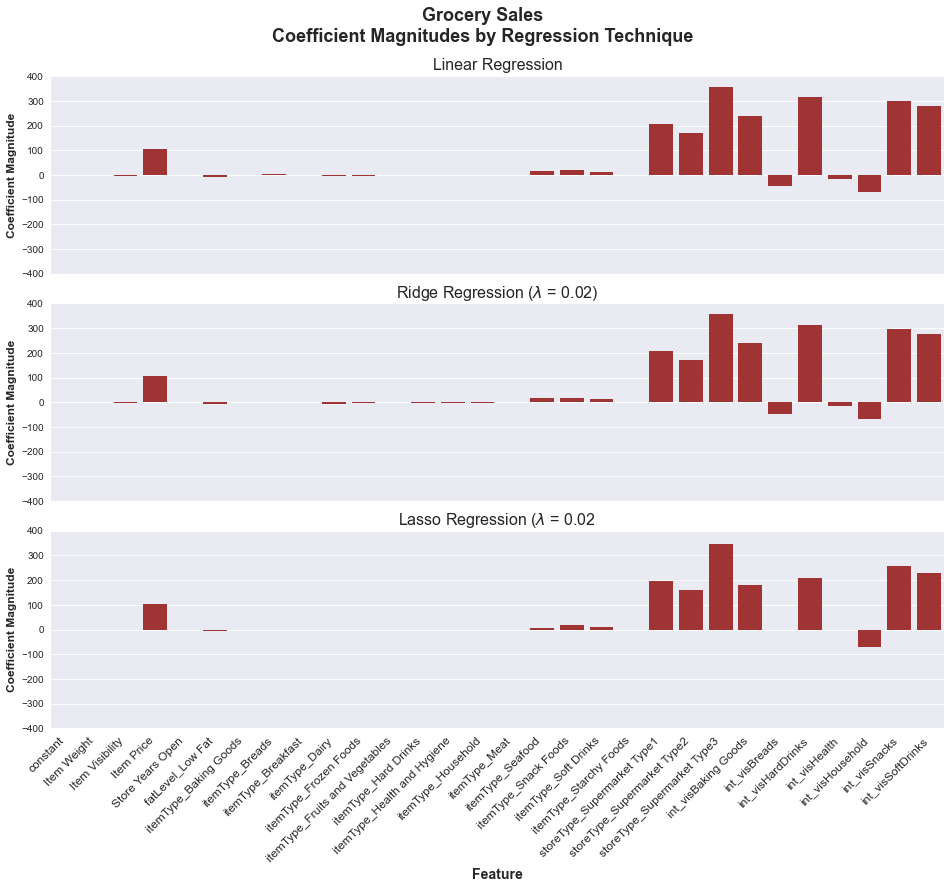

In [56]:
# Code Block 40
# Create comparable form of looking at coefficients values
plt.figure(figsize=(16,12))
plt.subplots_adjust(hspace=0.15)

# Set overall title for plot
plt.suptitle('Grocery Sales\nCoefficient Magnitudes by Regression Technique', fontweight='bold', 
          fontsize='18', horizontalalignment='center', y = .96)

# Create a bar plot of regression coefficients for linear regression
plt.subplot(311)
chart1 = sns.barplot(x = index, y = 'Linear', data = df_coef, color = 'firebrick')
chart1.set_title("Linear Regression", fontdict = {'fontsize' : 16})
chart1.set_ylim([-400, 400])
chart1.set_ylabel('Coefficient Magnitude', fontweight='bold', fontsize='12', ha='center')
chart1.tick_params(labelbottom=False)   # Remove bottom tick labels

# Create a bar plot of regression coefficients for ridge regression
plt.subplot(312)
chart2 = sns.barplot(x = index, y = 'Ridge', data = df_coef, color = 'firebrick')
chart2.set_title("Ridge Regression ($\lambda$ = 0.02)", fontdict = {'fontsize' : 16})
chart2.set_ylim([-400, 400])
chart2.set_ylabel('Coefficient Magnitude', fontweight='bold', fontsize='12', ha='center')
chart2.tick_params(labelbottom=False)   # Remove bottom tick labels

# Create a bar plot of regression coefficients for lasso regression
plt.subplot(313)
chart3 = sns.barplot(x = index, y = 'Lasso', data = df_coef, color = 'firebrick')
chart3.set_title("Lasso Regression ($\lambda$ = 0.02", fontdict = {'fontsize' : 16})
chart3.set_ylim([-400, 400])
chart3.set_ylabel('Coefficient Magnitude', fontweight='bold', fontsize='12', ha='center')
chart3.set_xticklabels(index, rotation=45, ha='right', fontsize='12')
chart3.set_xlabel('Feature', fontweight='bold', fontsize='14', ha='center')

plt.show()

<a id="9"></a>
### Assignment Submission
<a href = "#99">Top</a>
###### The following code uses Javascript to remove scrollbars from the chart you generate

In [ ]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

## Python Assignment 6
### Name: George Gannon

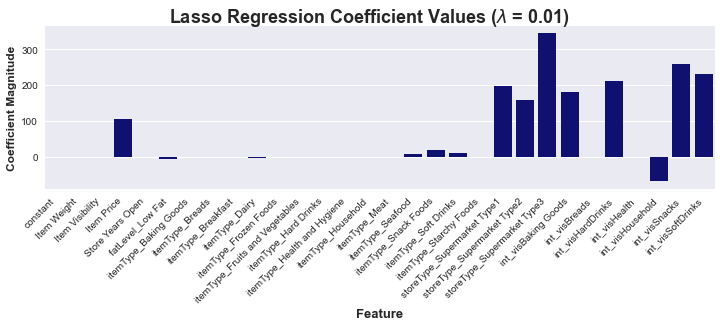

In [58]:
plt.figure(figsize=(12,3))
plt.suptitle('Lasso Regression Coefficient Values ($\lambda$ = 0.01)', fontweight='bold', 
          fontsize='18', ha='center', y = .97)
chart = sns.barplot(x = index, y = "Lasso", data = df_coef, color = 'navy')
chart.set_ylabel('Coefficient Magnitude', fontweight='bold', fontsize='12', ha='center')
chart.set_xticklabels(index, rotation=45, ha='right', fontsize='10')
chart.set_xlabel('Feature', fontweight='bold', fontsize='13', ha='center'); plt.show()

In [59]:
import datetime, socket
print(datetime.datetime.now().isoformat())
print("Your Computer Name is: " + socket.gethostname())
print("Your Computer IP Address is: " + socket.gethostbyname(socket.gethostname()))

2020-10-29T15:54:58.057161
Your Computer Name is: DESKTOP-0VRDGNF
Your Computer IP Address is: 192.168.0.133
